In [22]:
from keras import layers
from keras import models
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [58]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='elu'),

    layers.Dense(64, activation='elu'),

    layers.Dense(10, activation='softmax')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,218 (430.54 KB)

 Trainable params: 110,218 (430.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [61]:
model.compile(
    optimizer='Nadam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [62]:
model.fit(train_images, train_labels, epochs=25, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7497 - loss: 0.6740 - val_accuracy: 0.8622 - val_loss: 0.3708
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8838 - loss: 0.3125 - val_accuracy: 0.8931 - val_loss: 0.2926
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9030 - loss: 0.2576 - val_accuracy: 0.8989 - val_loss: 0.2823
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9116 - loss: 0.2367 - val_accuracy: 0.8901 - val_loss: 0.2926
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9236 - loss: 0.2084 - val_accuracy: 0.9020 - val_loss: 0.2663
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9305 - loss: 0.1866 - val_accuracy: 0.8935 - val_loss: 0.3092
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9350 - loss: 0.1708 - val_accuracy: 0.9074 - val_loss: 0.2591
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9417 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9094 - loss: 0.4386
0.9117000102996826


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


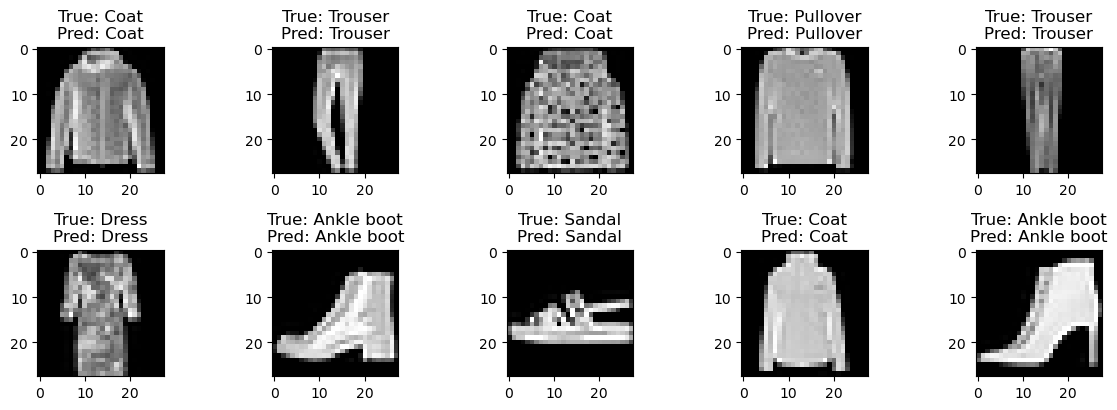

In [65]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

random_indices = np.random.choice(len(test_images), size=10, replace=False)

plt.figure(figsize=(12,6))
for i, idx in enumerate(random_indices):
    true_label = np.argmax(test_labels[idx])
    predicted_label = predicted_labels[idx]

    plt.subplot(3,5,i+1)
    plt.imshow(test_images[idx].reshape(28,28), cmap="gray")


    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}")

plt.tight_layout()
plt.show()


Точність моделі з convoluted layers краща ніж в моделі з завдання 12